##### https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

In [1]:
from tensorflow.keras import Sequential, Model

In [2]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

In [4]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
input_size = 784
hidden_size = 128
code_size = 34

input_img = Input(shape=(input_size,))
encoder = Dense(hidden_size,activation='relu')(input_img)
code = Dense(code_size,activation='relu')(encoder)
decoder = Dense(hidden_size,activation='relu')(code)
output_img = Dense(input_size,activation='sigmoid')(decoder)

In [10]:
autoencoder = Model(input_img,output_img)

In [11]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1874
Epoch 2/4
1875/1875 [==============================] - 2s 886us/step - loss: 0.1028
Epoch 3/4
1875/1875 [==============================] - 2s 895us/step - loss: 0.0961
Epoch 4/4
1875/1875 [==============================] - 2s 891us/step - loss: 0.0933


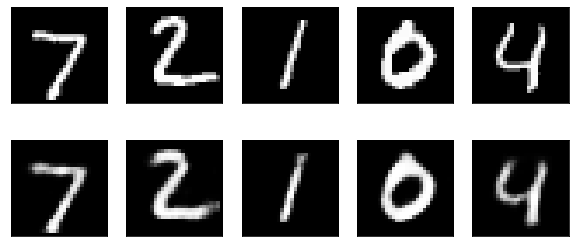

In [12]:
plot_autoencoder_outputs(autoencoder,5,(28,28))

In [13]:
weights = autoencoder.get_weights()[0].T

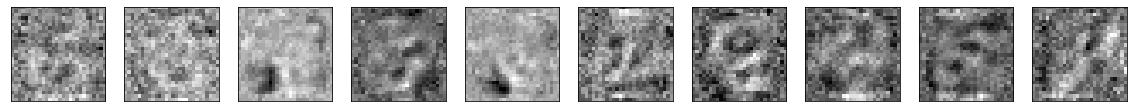

In [14]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Shallow AutoEncode

In [27]:
input_size = 784
code_size = 34

input_img = Input(shape=(input_size,))
code = Dense(code_size,activation='relu')(input_img)
output_img = Dense(input_size,activation='sigmoid')(code)

In [28]:
autoencoder = Model(input_img,output_img)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 1s 665us/step - loss: 0.2206
Epoch 2/4
1875/1875 [==============================] - 1s 656us/step - loss: 0.1060
Epoch 3/4
1875/1875 [==============================] - 1s 662us/step - loss: 0.0947
Epoch 4/4
1875/1875 [==============================] - 1s 661us/step - loss: 0.0925


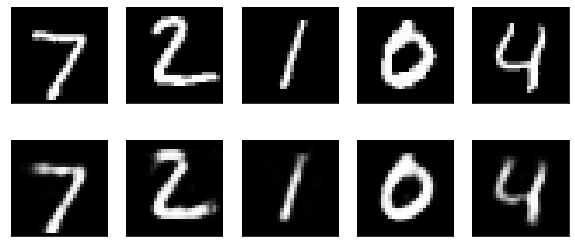

In [29]:
plot_autoencoder_outputs(autoencoder,5,(28,28))

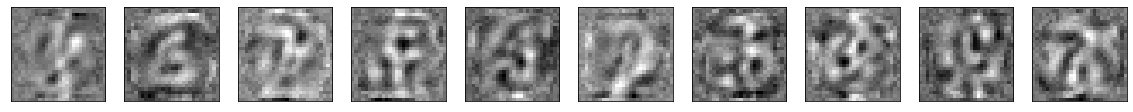

In [39]:
weights = autoencoder.get_weights()[0].T

n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+0].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#### Denoising AutoEncoder

In [9]:
noise_factor = 0.4

x_train_n = x_train + noise_factor*np.random.normal(size=x_train.shape)
x_test_n = x_test + noise_factor*np.random.normal(size=x_test.shape)

In [10]:
x_train_n = np.clip(x_train_n,0.0,1.0)
x_test_n = np.clip(x_test_n,0.0,1.0)

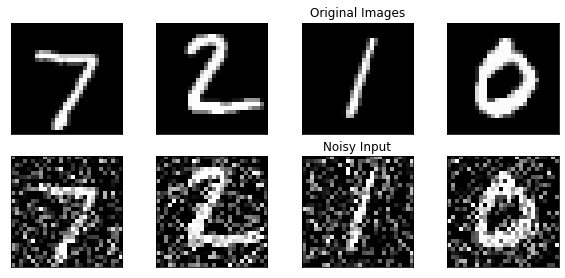

In [11]:
n = 4
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_n[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [21]:
input_size = 784
hidden_size = 128
code_size = 34

input_img = Input(shape=(input_size,))
encoder = Dense(hidden_size,activation='relu')(input_img)
code = Dense(code_size,activation='relu')(encoder)
decoder = Dense(hidden_size,activation='relu')(code)
output_img = Dense(input_size,activation='sigmoid')(decoder)

In [22]:
autoencoder = Model(input_img,output_img)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train_n,x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2116
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1307
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1222
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1181
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1157
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1139
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1129
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1114
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1104
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1100


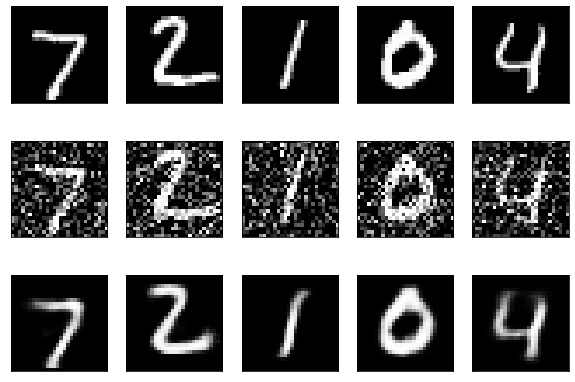

In [23]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_n)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_n[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')
